# Método de Newton


Escribir la interpretación gráfica

Sea $r$ un cero de $f$ y sea $x$ una aproximación a $r$. Si $f''$ existe y es contina, entonces por el teorema de Taylor $$0 = f(r) = f(x+h) = f(x) + hf'(x) + \mathcal{O}(h^2).$$ Si $h$ es pequeña (esto es, $x$ cercana a $r$) entonces es razonable ignorar el término $\mathcal{O}(h^2)$ y resolver el resto de la ecuación para $h$. Si $x$ es una aproximación a $r$, entonces $x- \frac{f(x)}{f'(x)}$ debería ser una mejor aproximación a $r$. El método de Newton comienza con una estimación $x_0$ de $r$ y luego define inductivamente $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \qquad n \geq 0.$$


## Algotirmo de Newton-Raphson

1. Dar una aproximación inicial $x_0$.
2. Calcular la ecuación de la recta tangente a la curva $f(x)$ que pasa por el punto $(x_0, f(x_0))$.
3. Determinar la intersección de la recta tangente con el eje $x$ y nombrar como $x_1$.
4. Si $f(p_1) \neq 0$ renombrar a $p_1 = p_0$. 

Ejemplo. 

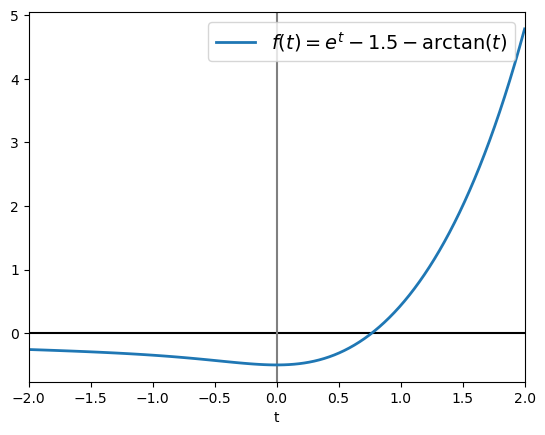

In [123]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-2, 2, 100)
sig = np.exp(t) - 1.5 - np.arctan(t)

plt.axhline(y=0, color="black")
#plt.axhline(y=0.5, color="black", linestyle=":")
#plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
#plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(t, sig, linewidth=2, label=r"$f(t) = e^t - 1.5 - \arctan(t)$")
plt.xlim(-2, 2)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()


In [128]:
def f(x):
    return np.exp(x) - 1.5 - np.arctan(x)

def df(x):
    return np.exp(x) - (1+x**2)**(-1)

#x0 = -7 #valor inicial
#Tol = 1e-28 #tolerancia 1e-8 = 0.00000001
#N_0=1000 #Número máximo iteraciones
#contador=0

#while contador < N_0:
#    x1=x0-f(x0)/df(x0)
#    if np.abs(x1-x0)>Tol:
#        #print(contador,"\t",x0,"\t",f(x0),"\t",df(x0),np.abs(x1-x0))
#        print(f'{x0:.16f}',"\t",f'{f(x0):.16f}',"\t",f'{np.abs(x1-x0):.16f}')
#    else:
#        break
#    x0=x1    
#    contador+=1   

def metnewton(f,df,x0,TOL,N0):
    contador=0
    while contador < N0:
        x1=x0-f(x0)/df(x0)
        if np.abs(x1-x0)>TOL:
            print(f'{x0:.16f}',"\t",f'{f(x0):.16f}',"\t",f'{np.abs(x1-x0):.16f}')
            x0=x1    
            contador+=1
        else:
            break        
    return x1

print(metnewton(f,df,-7.0,0.5e-3,100))
    

-7.0000000000000000 	 -0.0701888458437128 	 3.6770961766400134
-10.6770961766400134 	 -0.0225666081098759 	 2.6020711989927001
-13.2791673756327135 	 -0.0043660193339126 	 0.7744884786365240
-14.0536558542692376 	 -0.0002390197770530 	 0.0474541025971753
-14.101269770939416


In [127]:
import scipy.optimize as optimize
print(optimize.newton(f,-7.0,df,tol = 1e-3, maxiter=1000,full_output=True,disp=True))

(-14.101269770939416,       converged: True
           flag: converged
 function_calls: 10
     iterations: 5
           root: -14.101269770939416)
